# EMAIL SPAM DETECTION WITH MACHINE LEARNING

Spam or junk mail is a type of email that is sent to a massive  number of usersat one time, or most dangerously phishing content.
In this  project , we will use python to build an email spam detector. Then w'll use machine learning to train the spam detector, to recognize and classify mails into spam and non-spam.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
#!pip install nltk
import nltk  #natural language toolkit library
import re
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the Dataset
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns = {"v1" : "target", "v2": "text"}, inplace =True)

In [7]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.shape

(5169, 2)

In [11]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

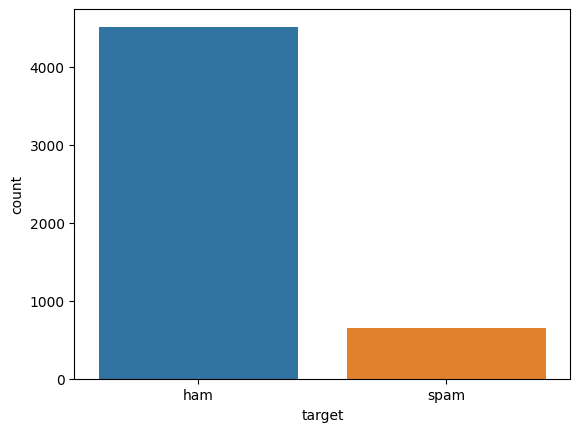

In [12]:
sns.countplot(df["target"])

([<matplotlib.patches.Wedge at 0x139da86d130>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

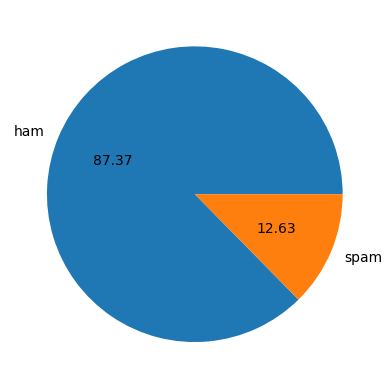

In [13]:
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct = '%0.2f')

In [14]:
def clean_text(i):
    i = re.sub("[^A-Za-z" "]+", " ", i).lower()
    i = nltk.word_tokenize(i)
    
    w = []

    for word in i:
        if word not in stopwords.words('english') and word not in string.punctuation:
            w.append(word)
  
    i = w[:]
    w.clear()
    
    for word in i:
        w.append(ps.stem(word))

    return " ".join(w) 

In [15]:
ps = PorterStemmer()

In [16]:
# Applying Testing Function 
df.text = df.text.apply(clean_text)
df.text.head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: text, dtype: object

In [17]:
# Removing Empty Rows if any
df = df.loc[df.text != "", :]

In [18]:
x = df["text"]

y = df["target"]

In [45]:
# Splitting data into train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [46]:
# Countvectorizer

cv = CountVectorizer()

features = cv.fit_transform(x_train)

In [28]:
# preparing Naive Bayes Model on Training Data
#!pip install scipy
# import scipy
import sklearn

In [47]:
# Multinomial Naive Bayes

classifier_mb = MB()

classifier_mb.fit(features, y_train)

MultinomialNB()

In [52]:
features_test = cv.transform(x_test)

In [49]:
print(classifier_mb.score(features_test,y_test))

0.9796708615682478


So, We have used Multinominal Naive Bayes model to train our dataset ans classify it on spam or non spam mails. 

Our Model is giving us an accuracy of 97 % .